### 다중 퍼셉트론으로 손글씨 분류

In [4]:

# 사이킷런에 있는 제공한 이미지 이용할겁니다.
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch import optim
from sklearn.datasets import load_digits

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [10]:
digits = load_digits()

In [11]:
# 1st sample 출력 .images[index] --> 8x8 행렬
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [12]:
# 실제 레이블도 숫자 0인지 첫 번째 샘플 레이어 확인 .target[index]
print(digits.target[0])

0


In [13]:
# 전체 이미지 갯수?
print("전체 이미지 갯수 >>>", len(digits.images))

전체 이미지 갯수 >>> 1797


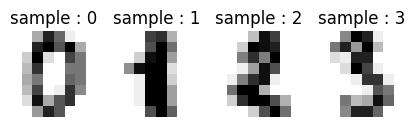

In [14]:
# 상위 4개만 샘플 이미지를 확인
# zip() 함수 이용 (enumerate() 함수도 많이 사용함)
"""
image = [1,2,3,4]
label = [사과, 바나나, 자몽, 수박]
리스트 길이가 동일할 때 zip 이용 가능
--> 1 사과 2 바나나 3 자몽 4 수박
"""
image_and_label_list = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(image_and_label_list[:4]) :
    plt.subplot(2, 5, index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample : %i' % label)
plt.show()

In [15]:
# 상위 레이블 5개 확인
for i in range(5) :
    print(i, "번 index sample label : ", digits.target[i])

# train data and label
x = digits.data # image data
y = digits.target # each image label
print(x, y)

0 번 index sample label :  0
1 번 index sample label :  1
2 번 index sample label :  2
3 번 index sample label :  3
4 번 index sample label :  4
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]] [0 1 2 ... 8 9 8]


In [16]:
model = nn.Sequential(
    nn.Linear(64, 32), # input layer = 64, hidden layer 1 = 32
    nn.ReLU(),
    nn.Linear(32, 16), # input layer 32, hidden layer 2 = 16
    nn.ReLU(),
    nn.Linear(16, 10) # input layer = 16, output_layer = 10
    # CrossEntrophyLoss() 이용 : output layer = 2 이상인 경우
)
print(model)

Sequential(
  (0): Linear(in_features=64, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=10, bias=True)
)


In [17]:
x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)
print(x, y)

tensor([[ 0.,  0.,  5.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ..., 10.,  0.,  0.],
        [ 0.,  0.,  0.,  ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1.,  ...,  6.,  0.,  0.],
        [ 0.,  0.,  2.,  ..., 12.,  0.,  0.],
        [ 0.,  0., 10.,  ..., 12.,  1.,  0.]]) tensor([0, 1, 2,  ..., 8, 9, 8])


In [18]:
loss_fun = nn.CrossEntropyLoss() # softmax를 포함한 손실함수
optimizer = optim.Adam(model.parameters())

In [19]:
losses = [] # loss graph 확인
epoch_number = 100

Epoch : [   0/100], loss : 2.353471
Epoch : [  10/100], loss : 2.064597
Epoch : [  20/100], loss : 1.758226
Epoch : [  30/100], loss : 1.387455
Epoch : [  40/100], loss : 1.043238
Epoch : [  50/100], loss : 0.743216
Epoch : [  60/100], loss : 0.522276
Epoch : [  70/100], loss : 0.375361
Epoch : [  80/100], loss : 0.281294
Epoch : [  90/100], loss : 0.220195
Epoch : [ 100/100], loss : 0.179626


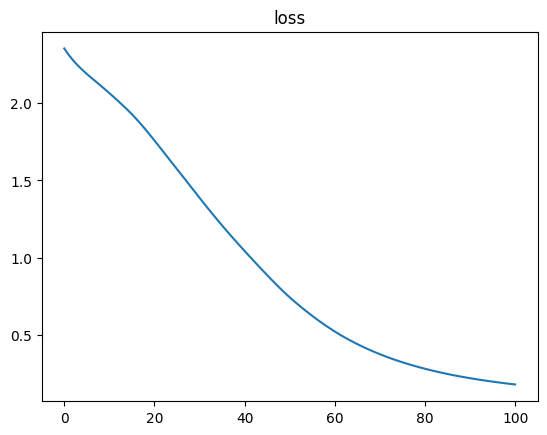

In [20]:
# train loop
for epoch in range(epoch_number + 1) :
    output = model(x) # 예측된 값

    loss = loss_fun(output, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0 :
        print("Epoch : [{:4d}/{}], loss : {:.6f}".format(epoch, epoch_number, loss.item()))

    # append
    losses.append(loss.item())

plt.title("loss")
plt.plot(losses)
plt.show()